In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
!pip install -q --upgrade ipython==5.5.0
!pip install -q --upgrade ipykernel==4.10



     |████████████████████████████████| 109 kB 36.7 MB/s 


In [3]:
# Set path to root directory
path = Path('/content/drive/My Drive/data')

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:

bs = 16

In [6]:
path.ls()

[PosixPath('/content/drive/My Drive/data/images')]

In [7]:
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/My Drive/data/images/margot_robbie_97.jpeg'),
 PosixPath('/content/drive/My Drive/data/images/margot_robbie_98.jpeg'),
 PosixPath('/content/drive/My Drive/data/images/margot_robbie_99.jpeg'),
 PosixPath('/content/drive/My Drive/data/images/margot_robbie_100.jpeg'),
 PosixPath('/content/drive/My Drive/data/images/margot_robbie_101.jpeg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpeg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

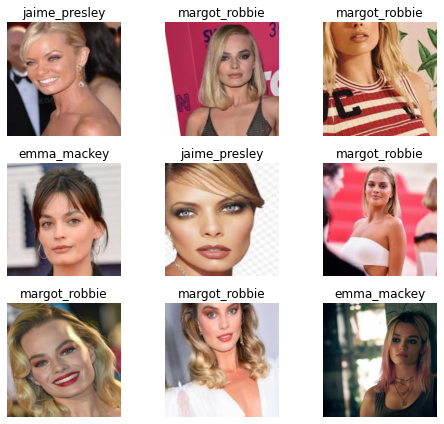

In [19]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:

print(data.classes)
len(data.classes),data.c

['emma_mackey', 'jaime_presley', 'margot_robbie']


(3, 3)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics= [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [20]:
learn_1 = cnn_learner(data, models.resnet34, metrics= [error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [24]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [21]:
learn_1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.331417,0.710479,0.253456,0.746544,00:26
1,0.938778,0.491024,0.184332,0.815668,00:28
2,0.744713,0.450667,0.179724,0.820276,00:27
3,0.601246,0.436237,0.175115,0.824885,00:26


In [22]:
learn_1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn_1.save('stage-1')

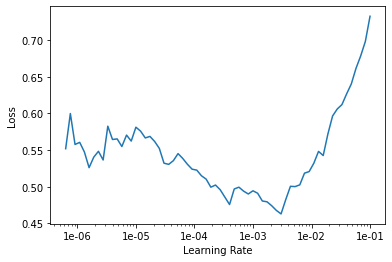

In [23]:
learn_1.recorder.plot()

In [ ]:
learn.lr_find()

In [ ]:
learn.save('stage-2')

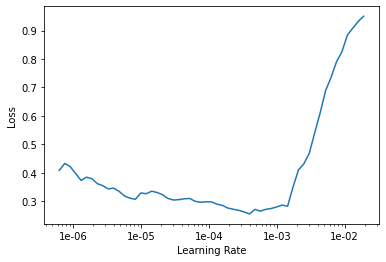

In [ ]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.384448,0.377039,0.138249,0.861751,00:28
1,0.372146,0.352634,0.133641,0.866359,00:27
2,0.385921,0.336412,0.124424,0.875576,00:27
3,0.373146,0.332519,0.129032,0.870968,00:28
4,0.335478,0.320278,0.129032,0.870968,00:27
5,0.309562,0.325254,0.119816,0.880184,00:28
6,0.311183,0.325261,0.119816,0.880184,00:27
7,0.310004,0.330397,0.110599,0.889401,00:28
8,0.285843,0.330385,0.119816,0.880184,00:29
9,0.252374,0.344743,0.124424,0.875576,00:27


In [ ]:
interp.most_confused(min_val=2)

[('margot_robbie', 'emma_mackey', 10),
 ('margot_robbie', 'jaime_presley', 8),
 ('jaime_presley', 'margot_robbie', 7),
 ('emma_mackey', 'margot_robbie', 5),
 ('jaime_presley', 'emma_mackey', 3),
 ('emma_mackey', 'jaime_presley', 2)]

In [ ]:
learn.load('stage-2')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


Learner(data=ImageDataBunch;

Train: LabelList (611 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
margot_robbie,margot_robbie,margot_robbie,margot_robbie,margot_robbie
Path: /content/drive/My Drive/data/images;

Valid: LabelList (152 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jaime_presley,margot_robbie,margot_robbie,margot_robbie,margot_robbie
Path: /content/drive/My Drive/data/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1

In [33]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.555942,0.321342,0.129032,0.870968,00:30
1,0.566672,0.340536,0.138249,0.861751,00:28
2,0.595475,0.349969,0.124424,0.875576,00:30
3,0.566242,0.803455,0.207373,0.792627,00:28
4,0.515463,0.391336,0.129032,0.870968,00:29
5,0.497242,0.252503,0.092166,0.907834,00:28
6,0.427381,0.257224,0.082949,0.917051,00:29
7,0.356342,0.247365,0.082949,0.917051,00:29
8,0.252733,0.225514,0.073733,0.926267,00:29
9,0.219877,0.229071,0.069124,0.930876,00:28


Conclusion
* The dataset used is limited to 700 images for each class, adding more images to the dataset will help in better classification.

* Unfreezing the layers of pre-trained network and updating all the weights from scratch helped in better feature extraction, as the task assigned to the model is little dissimilar to the task it was originally assigned to do.

* Model with more layers (Resnet 50) dealt better with instances of increase in train_loss and validation_loss, regularization might further help the model.